/tmp/ipykernel_31726/1470963995.py:54: DeprecationWarning: Please use `LSQUnivariateSpline` from the `scipy.interpolate` namespace, the `scipy.interpolate.fitpack2` namespace is deprecated.
  weight = pickle.load(f)


'print(qcent)\nprint(weightbinc)\nprint(qbin)\nprint(weightbine)\nprint(qcent48)\nprint(weightbinc48)'

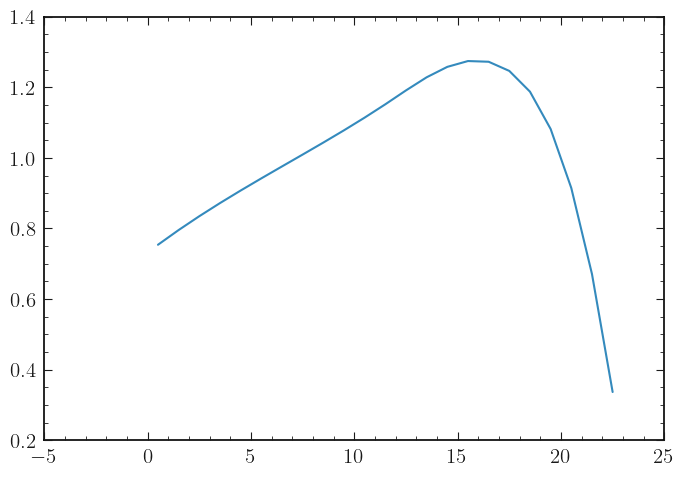

In [30]:
import uproot
import numpy as np
import math
import pandas as pd
import json
import pickle
import jsonpatch
from deepdiff import DeepDiff
import matplotlib.pyplot as plt

# from matplotlib.pyplot import *
# %matplotlib inline
import matplotlib
matplotlib.style.use('/nfs/dust/belle1/user/lorenzg/publik/style.mplstyle')

from publik.reweight import plot

# Files
with open('/nfs/dust/belle1/user/lorenzg/publik/pyhf_inputs/pyhf_publication_B_K_nunu.json', 'rb') as f:
    jsonPub = json.load(f)
with open('/nfs/dust/belle1/user/lorenzg/publik/analysis_repos/b-2-hadronnunubar-with-inclusive-tagging-new/code/plotting/json/pyhf_Bplus2Kplus_v24_with_continuum_weights_no_ff_q2.json', 'rb') as f:
    jsonPre = json.load(f)
with open('/nfs/dust/belle1/user/lorenzg/publik/analysis_repos/b-2-hadronnunubar-with-inclusive-tagging-new/code/plotting/json/pyhf_Bplus2Kplus_v24_with_continuum_weights_no_ff_bin_12_q2.json', 'rb') as f:
    jsonPre12 = json.load(f)
with open('/nfs/dust/belle1/user/lorenzg/publik/analysis_repos/b-2-hadronnunubar-with-inclusive-tagging-new/code/plotting/json/pyhf_Bplus2Kplus_v24_with_continuum_weights_no_ff_q2.json', 'rb') as f:
    jsonPre24 = json.load(f)
with open('/nfs/dust/belle1/user/lorenzg/publik/analysis_repos/b-2-hadronnunubar-with-inclusive-tagging-new/code/plotting/json/pyhf_Bplus2Kplus_v24_with_continuum_weights_no_ff_bin_48_q2.json', 'rb') as f:
    jsonPre48 = json.load(f)
with open('/nfs/dust/belle1/user/lorenzg/publik/analysis_repos/b-2-hadronnunubar-with-inclusive-tagging-new/code/plotting/json/pyhf_Bplus2Kplus_v24_with_continuum_weights_no_ff_bin_240_q2.json', 'rb') as f:
    jsonPre240 = json.load(f)
    
binning = jsonPre['content'][0]['binning3D']
qbin = np.array(binning[-1])
qcent = (qbin[:-1] + qbin[1:])/2

binning12 = jsonPre12['content'][0]['binning3D']
qbin12 = np.array(binning12[-1])
qcent12 = (qbin12[:-1] + qbin12[1:])/2

binning24 = jsonPre24['content'][0]['binning3D']
qbin24 = np.array(binning24[-1])
qcent24 = (qbin24[:-1] + qbin24[1:])/2

binning48 = jsonPre48['content'][0]['binning3D']
qbin48 = np.array(binning48[-1])
qcent48 = (qbin48[:-1] + qbin48[1:])/2

binning240 = jsonPre240['content'][0]['binning3D']
qbin240 = np.array(binning240[-1])
qcent240 = (qbin240[:-1] + qbin240[1:])/2

# Weight
with open('/nfs/dust/belle1/user/lorenzg/publik/analysis_repos/b-2-hadronnunubar-with-inclusive-tagging-new/code/b2hnn_py_modules/data/ff_weight.pkl', 'rb') as f:
    weight = pickle.load(f)
plt.plot(qcent[1:],weight(qcent[1:]))

weightbinc=weight(qcent)
weightbinc=np.where(qcent>0, weightbinc, 1.)
weightbinc=np.where(weightbinc>0, weightbinc, 1.)

weightbinc12=weight(qcent12)
weightbinc12=np.where(qcent12>0, weightbinc12, 1.)
weightbinc12=np.where(weightbinc12>0, weightbinc12, 1.)

weightbinc24=weight(qcent24)
weightbinc24=np.where(qcent24>0, weightbinc24, 1.)
weightbinc24=np.where(weightbinc24>0, weightbinc24, 1.)

weightbinc48=weight(qcent48)
weightbinc48=np.where(qcent48>0, weightbinc48, 1.)
weightbinc48=np.where(weightbinc48>0, weightbinc48, 1.)

weightbinc240=weight(qcent240)
weightbinc240=np.where(qcent240>0, weightbinc240, 1.)
weightbinc240=np.where(weightbinc240>0, weightbinc240, 1.)

weightbine=weight(qbin)
weightbine=np.where(qbin>=0., weightbine, 1.)
weightbine=np.where(weightbine>=0., weightbine, 1.)

"""print(qcent)
print(weightbinc)
print(qbin)
print(weightbine)
print(qcent48)
print(weightbinc48)"""

### Statistical uncertainty
$$
stat^2 = stat\_sum^2 + hist['sumw2']
$$
$$
stat\_sum^2 = yields * s^2 \qquad hist['sumw2'] = counts*weights
$$
$$
yields = counts * weights
$$
$$
stat^2 = counts^2*weights^2*s^2 + counts*weights^2
$$

In [3]:
def roundsig(x, sigfig):
    # round to significant figure
    try:
        return float(round(x, sigfig - int(math.floor(math.log10(abs(x)))) - 1))
    except:
        return float(0.0)

def stack(data, binning3d, weights=[]):
    if not list(weights):
        weights = np.ones(len(binning3d[-1])-1)
    data3d = np.reshape(data, [len(binning3d[j])-1 for j in range(len(binning3d))], order='F')
    data2d = np.sum(data3d*weights, axis=-1)
    datalist = np.ravel(data2d, order='F')
    datalist = [roundsig(i, 8) for i in datalist]
    return datalist

def stack2(data, binning3d, weights=[]):
    if not list(weights):
        weights = np.ones(len(binning3d[-1])-1)
    data3d = np.reshape(data, [len(binning3d[j])-1 for j in range(len(binning3d))], order='F')
    data2d = np.sqrt(np.sum(np.square(data3d*weights), axis=-1))
    datalist = np.ravel(data2d, order='F')
    datalist = [roundsig(i, 8) for i in datalist]
    return datalist

def stacksqrt(data, binning3d, weights=[]):
    if not list(weights):
        weights = np.ones(len(binning3d[-1])-1)
    data3d = np.reshape(data, [len(binning3d[j])-1 for j in range(len(binning3d))], order='F')
    data2d = np.sqrt(np.sum(data3d*weights**2, axis=-1))
    datalist = np.ravel(data2d, order='F')
    datalist = [roundsig(i, 8) for i in datalist]
    return datalist

def stackSysHi(uncu, datau, binning3d, weights=[]):
    if not list(weights):
        weights = np.ones(len(binning3d[-1])-1)
        
    datau3d = np.reshape(datau, [len(binning3d[j])-1 for j in range(len(binning3d))], order='F')
    uncu3d = np.reshape(uncu, [len(binning3d[j])-1 for j in range(len(binning3d))], order='F')

    # unc = uncu3d - (1-weights)*datau3d    
    unc = uncu3d*weights * (1 + (uncu3d - datau3d)*weights)
    unc3d = np.reshape(unc, [len(binning3d[j])-1 for j in range(len(binning3d))], order='F')
    unc2d = np.sum(unc3d, axis=-1)
    unclist = np.ravel(unc2d, order='F')
    unclist = [roundsig(i, 8) for i in unclist]
    return unclist

def stackSysLo(uncu, datau, binning3d, weights=[]):
    if not list(weights):
        weights = np.ones(len(binning3d[-1])-1)
        
    datau3d = np.reshape(datau, [len(binning3d[j])-1 for j in range(len(binning3d))], order='F')
    uncu3d = np.reshape(uncu, [len(binning3d[j])-1 for j in range(len(binning3d))], order='F')

    # unc = uncu3d - (1-weights)*datau3d    
    unc = uncu3d*weights * (1 - (uncu3d - datau3d)*weights)    
    unc3d = np.reshape(unc, [len(binning3d[j])-1 for j in range(len(binning3d))], order='F')
    unc2d = np.sum(unc3d, axis=-1)
    unclist = np.ravel(unc2d, order='F')
    unclist = [roundsig(i, 8) for i in unclist]
    return unclist

def stackStat(stat, syst, binning3d, weights=[]):
    if not list(weights):
        weights = np.ones(len(binning3d[-1])-1)
    stat3d = np.reshape(stat, [len(binning3d[j])-1 for j in range(len(binning3d))], order='F')
    stat2d = np.sum(stat3d*weights**2, axis=-1)

    syst3d = np.reshape(syst, [len(binning3d[j])-1 for j in range(len(binning3d))], order='F')
    syst2d = np.square(np.sum(np.sqrt(syst3d)*weights, axis=-1))
    
    stat2d = np.sqrt(stat2d+syst2d)
    
    datalist = np.ravel(stat2d, order='F')
    datalist = [roundsig(i, 8) for i in datalist]
    return datalist

def flatten_list(l):
    for el in l:
        if isinstance(el, list):
            yield from flatten_list(el)
        else:
            yield el
            
def applyJSON(d, fn):
    for k, v in d.items():
        if isinstance(v, dict):
            applyJSON(v, fn)
        elif isinstance(v, list): 
            if any(isinstance(x, dict) for x in v):
                for x in v: applyJSON(x, fn)
            else:
                d[k] = fn(v)

In [4]:
# def patchSignal(jsonPublication, jsonRaw, weights, ups, downs):
def patchSignal(jsonPublication, jsonRaw, weights):
    """
    inputs:
        jsonPublication:
            The published, SM FF wighted json file
        jsonRaw:
            The same as above but without FF weights applied, with additional q2 binning
        weights:
            The central weights in each q2 bin
    outputs:
        reweighted json ready for fitting
    """
    #SIGNAL
    patchChannelCounts = jsonpatch.JsonPatch(list(flatten_list([
        {'op': 'replace', 
         'path': f'/channels/{i}/samples/0/data', 
         'value': stack(jsonRaw['channels'][i]['samples'][0]['data'], jsonRaw['content'][i]['binning3D'], weights)}
        for i in range(2)
    ])))

    jsonNew = patchChannelCounts.apply(jsonPublication)

    #CHANNELS: modifiers - histosys
    for i in range(2):
    #for each histosys in jsonRaw
        for k in range(len(jsonRaw['channels'][i]['samples'][0]['modifiers'])):
            if jsonRaw['channels'][i]['samples'][0]['modifiers'][k]['type']=="histosys":
                for j in range(len(jsonNew['channels'][i]['samples'][0]['modifiers'])):
                    #find corresponding entry in jsonPublication
                    if jsonRaw['channels'][i]['samples'][0]['modifiers'][k]['name'] == jsonNew['channels'][i]['samples'][0]['modifiers'][j]['name']:
                        #patch corresponding entry
                        patchChannelsModifiersHistosys = jsonpatch.JsonPatch(         
                                        [
                                            {'op': 'replace', 
                                            'path': f'/channels/{i}/samples/0/modifiers/{j}/data/hi_data', 
                                            'value': stackSysHi( jsonRaw['channels'][i]['samples'][0]['modifiers'][k]['data']['hi_data'],
                                                                jsonRaw['channels'][i]['samples'][0]['data'],
                                                                jsonRaw['content'][i]['binning3D'],
                                                                weights)},
                                            {'op': 'replace', 
                                            'path': f'/channels/{i}/samples/0/modifiers/{j}/data/lo_data', 
                                            'value': stackSysLo( jsonRaw['channels'][i]['samples'][0]['modifiers'][k]['data']['lo_data'],
                                                                jsonRaw['channels'][i]['samples'][0]['data'],
                                                                jsonRaw['content'][i]['binning3D'],
                                                                weights)}
                                        ])
                        jsonNew = patchChannelsModifiersHistosys.apply(jsonNew)

    #CHANNELS: modifiers - staterror
    
    patchChannelsModifiersStaterror = jsonpatch.JsonPatch(
    list(flatten_list([
        {'op': 'replace', 
        'path': f'/channels/{i}/samples/0/modifiers/0/data', 
        'value': stackStat(jsonRaw['channels'][i]['samples'][0]['modifiers'][1]['data'], 
                           jsonRaw['channels'][i]['samples'][0]['modifiers'][2]['data'], 
                           jsonRaw['content'][i]['binning3D'],
                           weights)}
        for i in range(2)
    ])))
    
    jsonNew = patchChannelsModifiersStaterror.apply(jsonNew)

    #CHANNELS: modifiers - ff
    patchChannelsModifiersRMff = jsonpatch.JsonPatch(
    list(flatten_list([
        [            
            [
                {'op': 'remove', 
                 'path': f'/channels/{i}/samples/0/modifiers/5'},
            ] for _ in range(3)
        ] for i in range(2)
    ])))

    jsonNew = patchChannelsModifiersRMff.apply(jsonNew)
    
    # patchChannelsModifiersFF = jsonpatch.JsonPatch(
    # list(flatten_list([
    #     [            
    #         [
    #             {'op': 'add', 
    #              'path': f'/channels/{i}/samples/0/modifiers/5', 
    #              'value': 
    #                 {
    #                     "name": f'corr_ff_{len(ups)-j}',
    #                     "type": "histosys",
    #                     "data": {"hi_data": stack(jsonRaw['channels'][i]['samples'][0]['data'], jsonRaw['content'][i]['binning3D'], ups[j]), 
    #                              "lo_data": stack(jsonRaw['channels'][i]['samples'][0]['data'], jsonRaw['content'][i]['binning3D'], downs[j])}
    #                 }
    #             }
    #         ] for j in range(len(ups))
    #     ] for i in range(2)
    # ])))
    
    # jsonNew = patchChannelsModifiersFF.apply(jsonNew)
    
    return(jsonNew)

In [5]:
jsonNewSig = patchSignal(jsonPub, jsonPre, weightbinc)

In [6]:
jsonNewSig12 = patchSignal(jsonPub, jsonPre12, weightbinc12)
jsonNewSig24 = patchSignal(jsonPub, jsonPre24, weightbinc24)
jsonNewSig48 = patchSignal(jsonPub, jsonPre48, weightbinc48)
jsonNewSig240 = patchSignal(jsonPub, jsonPre240, weightbinc240)


In [7]:
#CHANNELS: modifiers - rm ff
patchChannelsModifiersRMff = jsonpatch.JsonPatch(
list(flatten_list([
    [            
        [
            {'op': 'remove', 
             'path': f'/channels/{i}/samples/0/modifiers/5'},
        ] for _ in range(3)
    ] for i in range(2)
])))

jsonPubnoFF = patchChannelsModifiersRMff.apply(jsonPub)

In [8]:
len(DeepDiff(jsonPubnoFF,jsonNewSig, math_epsilon=1e-3)["values_changed"])
DeepDiff(jsonPubnoFF,jsonNewSig, math_epsilon=1e-5)["values_changed"];

len(DeepDiff(jsonPubnoFF,jsonNewSig12, math_epsilon=1e-3)["values_changed"])
DeepDiff(jsonPubnoFF,jsonNewSig12, math_epsilon=1e-5)["values_changed"];

len(DeepDiff(jsonPubnoFF,jsonNewSig24, math_epsilon=1e-3)["values_changed"])
DeepDiff(jsonPubnoFF,jsonNewSig24, math_epsilon=1e-5)["values_changed"];

len(DeepDiff(jsonPubnoFF,jsonNewSig48, math_epsilon=1e-3)["values_changed"])
DeepDiff(jsonPubnoFF,jsonNewSig48, math_epsilon=1e-5)["values_changed"];

len(DeepDiff(jsonPubnoFF,jsonNewSig240, math_epsilon=1e-3)["values_changed"])
DeepDiff(jsonPubnoFF,jsonNewSig240, math_epsilon=1e-5)["values_changed"];

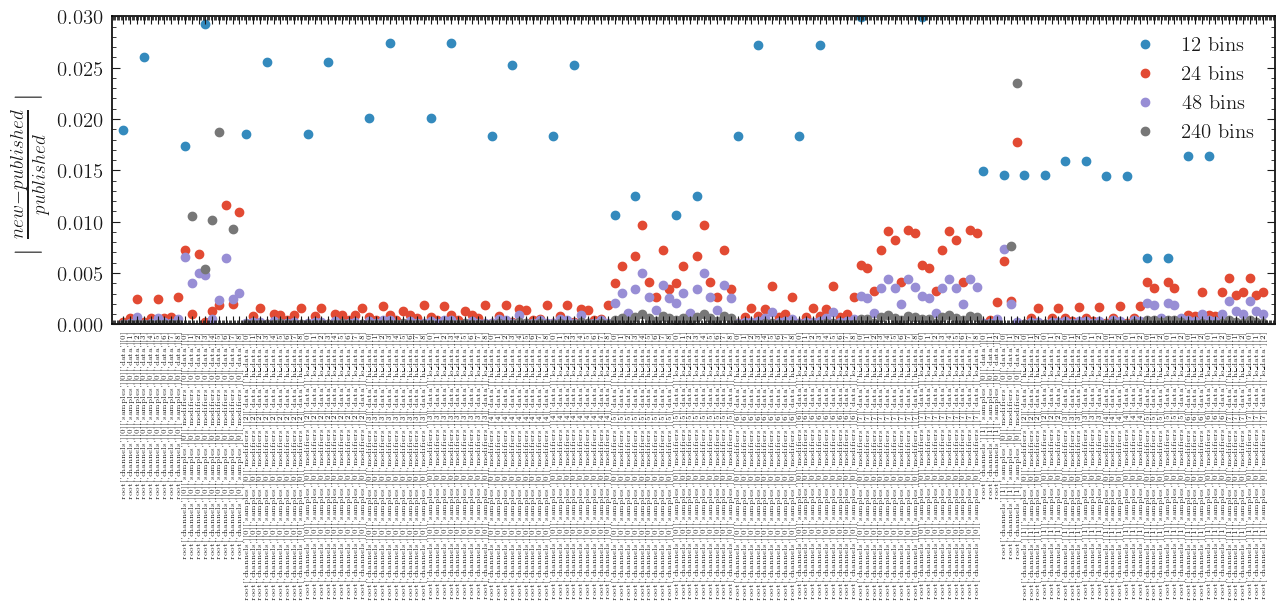

In [9]:
diffdict = DeepDiff(jsonPubnoFF,jsonNewSig12, math_epsilon=1e-10)["values_changed"]
diffs12 = [{diff: (diffdict[diff]['new_value']-diffdict[diff]['old_value'])/diffdict[diff]['old_value']}
         for diff in diffdict ]

diffdict = DeepDiff(jsonPubnoFF,jsonNewSig24, math_epsilon=1e-10)["values_changed"]
diffs24 = [{diff: (diffdict[diff]['new_value']-diffdict[diff]['old_value'])/diffdict[diff]['old_value']}
         for diff in diffdict ]

diffdict = DeepDiff(jsonPubnoFF,jsonNewSig48, math_epsilon=1e-10)["values_changed"]
diffs48 = [{diff: (diffdict[diff]['new_value']-diffdict[diff]['old_value'])/diffdict[diff]['old_value']}
         for diff in diffdict ]

diffdict = DeepDiff(jsonPubnoFF,jsonNewSig240, math_epsilon=1e-10)["values_changed"]
diffs240 = [{diff: (diffdict[diff]['new_value']-diffdict[diff]['old_value'])/diffdict[diff]['old_value']}
         for diff in diffdict ]

fig = plt.figure(figsize=(15, 4))

ax = fig.add_subplot(111)

plt.scatter(list([list(i.keys())[0] for i in diffs12]), np.absolute(list([list(i.values())[0] for i in diffs12])), label ='12 bins')
plt.scatter(list([list(i.keys())[0] for i in diffs24]), np.absolute(list([list(i.values())[0] for i in diffs24])), label ='24 bins')
plt.scatter(list([list(i.keys())[0] for i in diffs48]), np.absolute(list([list(i.values())[0] for i in diffs48])), label ='48 bins')
plt.scatter(list([list(i.keys())[0] for i in diffs240]), np.absolute(list([list(i.values())[0] for i in diffs240])), label ='240 bins')
plt.xticks(rotation = 90, fontsize=5) # Rotates X-Axis Ticks by 45-degrees
ax.set_ylim((0,0.03))
ax.margins(0.01)
ax.legend(loc='upper right')
ax.set_ylabel(r'$\mid\frac{new-published}{published}\mid$')


plt.savefig('../results/fit/binningcompare.pdf', bbox_inches='tight')
plt.show()

In [22]:
jsonPubnoFF['channels'][1]['samples'][0]['data']

[2.270102, 1.493785, 0.397157]

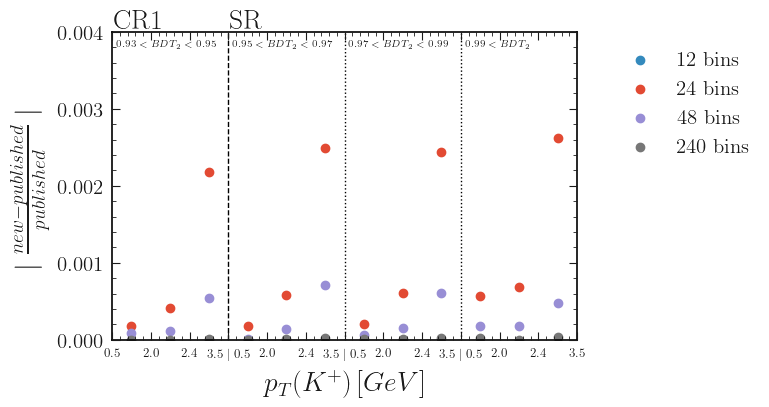

In [39]:
def diff(old, new):
    return np.abs(
        np.divide(
            np.subtract(new, old),
            old
        )
    )

diffs12 = np.concatenate((
            diff(jsonPubnoFF['channels'][1]['samples'][0]['data'], jsonNewSig12['channels'][1]['samples'][0]['data']),
            diff(jsonPubnoFF['channels'][0]['samples'][0]['data'], jsonNewSig12['channels'][0]['samples'][0]['data'])
))

diffs24 = np.concatenate((
            diff(jsonPubnoFF['channels'][1]['samples'][0]['data'], jsonNewSig24['channels'][1]['samples'][0]['data']),
            diff(jsonPubnoFF['channels'][0]['samples'][0]['data'], jsonNewSig24['channels'][0]['samples'][0]['data'])
))

diffs48 = np.concatenate((
            diff(jsonPubnoFF['channels'][1]['samples'][0]['data'], jsonNewSig48['channels'][1]['samples'][0]['data']),
            diff(jsonPubnoFF['channels'][0]['samples'][0]['data'], jsonNewSig48['channels'][0]['samples'][0]['data'])
))

diffs240 = np.concatenate((
            diff(jsonPubnoFF['channels'][1]['samples'][0]['data'], jsonNewSig240['channels'][1]['samples'][0]['data']),
            diff(jsonPubnoFF['channels'][0]['samples'][0]['data'], jsonNewSig240['channels'][0]['samples'][0]['data'])
))

fig = plt.figure(figsize=(6, 4))

ax = fig.add_subplot(111)

x = np.arange(len(diffs12))

plt.scatter(x, diffs12, label ='12 bins')
plt.scatter(x, diffs24, label ='24 bins')
plt.scatter(x, diffs48, label ='48 bins')
plt.scatter(x, diffs240, label ='240 bins')

plot.axsettingsSR(ax)

ax.set_ylim((0,0.004))

plot.annodateSR(ax)

ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_ylabel(r'$\mid\frac{new-published}{published}\mid$')


plt.savefig('../results/fit/binningcompare_signal.pdf', bbox_inches='tight')
plt.show()